In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('exams.csv')

## Encoding

In [3]:
labels = ['fail','pass']
bins = [0,55,101]
df['average score'] = (df['math score'] + df['writing score']+df['reading score'])/3
df['math score'] = pd.cut(df['math score'],bins = bins, labels = labels, include_lowest = True)
df['reading score'] = pd.cut(df['reading score'],bins = bins, labels = labels, include_lowest = True)
df['writing score'] = pd.cut(df['writing score'],bins = bins, labels = labels, include_lowest = True)
df['average score'] = pd.cut(df['average score'],bins = bins, labels = labels, include_lowest = True)


Logistic regression required the input variables to be continous. Therefore the factors are transformed into one hot encoders to represent the discrete data. It also requires the dependent variables to be discrete. As such, the scores are put into bins similar to the Naive Bayes model

In [11]:
onehot_encoder = OneHotEncoder()
data = onehot_encoder.fit_transform(df[["gender","race/ethnicity",'parental level of education','lunch','test preparation course']]).toarray()
lables = onehot_encoder.categories_
lables = np.array(lables,dtype=object).ravel()
lables = np.hstack(lables)

le = preprocessing.LabelEncoder()
for col in df.columns:
        df[col] = le.fit_transform(df[col])
    
target = df.iloc[:,5:9]
factors = pd.DataFrame(data, columns = lables)

## Testing and Training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
   factors, target, test_size = 0.3, random_state = 1
)


In [14]:
log_Model = LogisticRegression(random_state = 0, max_iter = 5000)
log_model1 = log_Model.fit(X_train, y_train['average score'])
y_pred_average = log_Model.predict(X_test)
print("Training set score: {:.3f}".format(log_model1.score(X_train,y_train['average score'])))
print("Test set score: {:.3f}".format(log_model1.score(X_test,y_test['average score'])))

Training set score: 0.829
Test set score: 0.810


## Evaluation

In [15]:
confusion_matrix(y_test['average score'], y_pred_average,labels=None, sample_weight=None, normalize=None)

array([[ 16,  48],
       [  9, 227]], dtype=int64)

Logistic regression classifier has tp value of 16, fp of 9, fn of 48 and tn of 222

In [16]:
print(classification_report(y_test['average score'], y_pred_average))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36        64
           1       0.83      0.96      0.89       236

    accuracy                           0.81       300
   macro avg       0.73      0.61      0.62       300
weighted avg       0.79      0.81      0.78       300



Precision score of 0.83, recall 0.96, and a f1 score of 0.89

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test['average score'], y_pred_average)

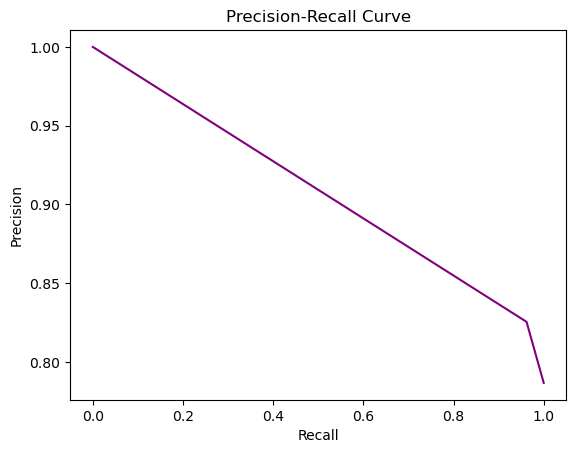

In [18]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color= 'purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [9]:
print(target)

    math score reading score writing score average score
0         pass          pass          pass          pass
1         fail          pass          fail          fail
2         pass          pass          fail          pass
3         pass          pass          pass          pass
4         pass          pass          pass          pass
..         ...           ...           ...           ...
995       pass          pass          pass          pass
996       pass          pass          pass          pass
997       fail          fail          fail          fail
998       pass          pass          pass          pass
999       pass          pass          pass          pass

[1000 rows x 4 columns]


In [7]:
print(y_test['average score'])

507    fail
818    pass
452    pass
368    pass
242    pass
       ... 
459    pass
415    pass
61     pass
347    pass
349    pass
Name: average score, Length: 300, dtype: category
Categories (2, object): ['fail' < 'pass']
